**In this project, I tried to achieve the lowest root mean square error score by using Regularization techniques.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
data = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [3]:
data.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [5]:
y = data.groupby("City")["AverageTemperature"].mean().values

In [6]:
y

array([26.1637372 , 17.52507266, 26.52985294, 17.37058733, 20.31261703,
       10.39211715, 22.61434569, 24.85589593, 27.1647333 , 21.07139647,
        8.91623373, 20.00226462, 26.63145215, 21.72759494, 21.22125921,
       26.04215205, 21.7970272 , 16.07907955, 17.18415786,  4.92379793,
       10.63804214, 10.07064374, 16.84496207, 24.6275203 , 10.22907681,
       25.7446715 , 25.1658609 , 25.49056793, 20.35129204, 24.13839654,
       27.00863954, 21.22125921, 21.60868426, 20.20784201,  3.62574407,
       27.19398357, 26.86933493, 26.37310517, 13.50740903, 17.27806458,
       25.39305794, 26.50820969, 27.69206602, 13.08981382, 14.34291891,
       26.1405369 , 24.76004078, 26.01725904,  7.04103285, 23.86644092,
       26.56592719, 24.13839654, 24.76004078, 16.76911966,  9.4590379 ,
       15.87803844, 23.69304553, 28.41785845, 11.44870404, 26.44833449,
       12.57199211, 13.37430382, 15.71742238, 27.15196367,  4.44501369,
        3.99971068, 14.7550665 , 25.65501635, 16.08139511, 15.60

In [7]:
newData = data.drop_duplicates(subset=["City"])
newData = newData.drop(["AverageTemperature","dt","City"],axis=1)
newData["AverageTemperature"] = y

In [57]:
newData

,AverageTemperatureUncertainty,Country,Latitude,Longitude,AverageTemperature
0,1.435,Côte D'Ivoire,5.63N,3.23W,26.163737
1977,1.537,Ethiopia,8.84N,38.11E,17.525073
3942,2.286,India,23.31N,72.52E,26.529853
6555,1.993,Syria,36.17N,37.79E,17.370587
9224,1.848,Egypt,31.35N,30.16E,20.312617
...,...,...,...,...,...
227665,2.006,Japan,36.17N,139.23E,12.555998
229690,1.905,Canada,44.20N,80.50W,5.773911
232929,2.118,Sudan,15.27N,32.50E,29.081291
234786,2.772,China,29.74N,114.46E,16.830944


In [8]:
newData.dtypes

AverageTemperatureUncertainty    float64
Country                           object
Latitude                          object
Longitude                         object
AverageTemperature               float64
dtype: object

In [9]:
newData = pd.get_dummies(newData)

In [10]:
newData

,AverageTemperatureUncertainty,AverageTemperature,Country_Afghanistan,Country_Angola,Country_Australia,Country_Bangladesh,Country_Brazil,Country_Burma,Country_Canada,Country_Chile,...,Longitude_8.22E,Longitude_80.09E,Longitude_80.50W,Longitude_80.60E,Longitude_87.27W,Longitude_88.25E,Longitude_90.00E,Longitude_95.44E,Longitude_98.96W,Longitude_99.91E
0,1.435,26.163737,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1977,1.537,17.525073,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3942,2.286,26.529853,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6555,1.993,17.370587,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9224,1.848,20.312617,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227665,2.006,12.555998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229690,1.905,5.773911,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
232929,2.118,29.081291,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234786,2.772,16.830944,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = newData.drop("AverageTemperature",axis = 1)

In [12]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model, cv=5):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
    return rmse

In [13]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
rmse = rmse_cv(linearModel)

In [14]:
print(f"RMSE AVERAGE = {rmse.mean()}")

RMSE AVERAGE = 5.8836555069101735


In [15]:
from sklearn.linear_model import Ridge
ridgeModel = Ridge(alpha = 0.1)
rmse = rmse_cv(ridgeModel)

In [16]:
print(f"RMSE AVERAGE = {rmse.mean()}")

RMSE AVERAGE = 5.7319155090123655


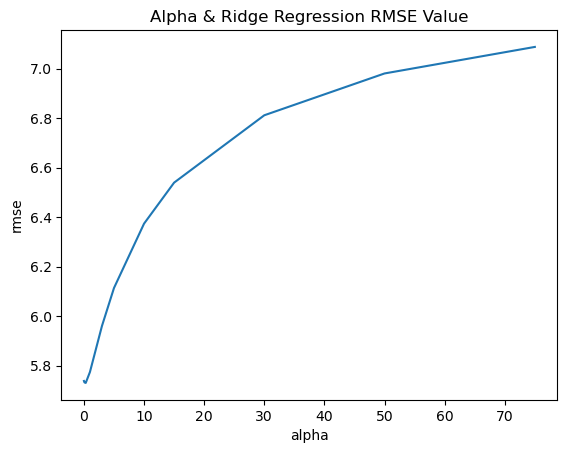

In [23]:
alphas = [0.005,0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)

# RMSE vs alpha grafiği
cv_ridge.plot(title = "Alpha & Ridge Regression RMSE Value")

plt.xlabel("alpha")
plt.ylabel("rmse")

plt.show()

In [24]:
optimal_ridge_alpha = cv_ridge[cv_ridge == cv_ridge.min()].index.values[0]

In [25]:
print(f"Optimal Alpha = {optimal_ridge_alpha}")

Optimal Alpha = 0.3


In [26]:
ridgeModel = Ridge(alpha = 1.0)
rmse = rmse_cv(ridgeModel)
print(f"RMSE AVERAGE = {rmse.mean()}")

RMSE AVERAGE = 5.773992292125191


In [27]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

lassoModel = LassoCV(alphas = np.linspace(0.010, 1, 100), cv = 5).fit(X, y)
lassoModel.alpha_

optimalLassoAlpha = lassoModel.alpha_
print(f"Optimal Lasso Alpha: {optimalLassoAlpha}")

Optimal Lasso Alpha: 0.02


In [28]:
lassoModel = Lasso(alpha = optimalLassoAlpha)
rmse = rmse_cv(lassoModel)
print(f"RMSE AVERAGE = {rmse.mean()}")

RMSE AVERAGE = 6.106004707601253


**As a result, the lowest root mean square error score was obtained when alpha equals 0.3 in the ridge Regularization model!**